# Jupyter intro

## Imports

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib
import skimpy
import os

from myplot import myplot

### 1. Make data folder and download discharge data

In [36]:
if not os.path.exists('data/'):
    os.mkdir('data/')

if not os.path.exists('data/discharge_timeseries.csv'):
        url = 'https://arcticdata.io/metacat/d1/mn/v2/object/urn%3Auuid%3Ae248467d-e1f9-4a32-9e38-a9b4fb17cefb'
        msg = urllib.request.urlretrieve(url, 'data/discharge_timeseries.csv')

### 2. read in data and clean

In [37]:
df = pd.read_csv('data/discharge_timeseries.csv')
df.head()

clean_df = skimpy.clean_columns(df)
clean_df['date'] = pd.to_datetime(clean_df['date'])
skimpy.skim(clean_df)


╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 17856  │ │ float64     │ 5     │                                                          │
│ │ Number of columns │ 6      │ │ datetime64  │ 1     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━┳━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column     ┃ NA ┃ NA %        ┃ mean     ┃ sd      ┃ p0       ┃ p25    ┃ p50    ┃ p75    ┃ p100   ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━╇━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩  │
│ │ total_pres │  0 │           0 │    9.888 │  0.1247 │    9.587 │  9.795 │   9.88 │  9.984 │  10.17 │ ▁▅█▇▅▂ │  │
│ │ sure_m     │    │             │          │         │          │        │        │        │        │        │  │
│ │ air_pressu │  0 │           0 │    9.613 │ 0.06011 │    9.474 │  9.559 │  9.626 │   9.66 │  9.721 │ ▂▅▄▆█▃ │  │
│ │ re_m       │    │             │          │         │          │        │        │        │        │        │  │
│ │ stage_m    │  0 │           0 │   0.2752 │  0.1152 │ 0.000565 │ 0.1739 │ 0.2707 │ 0.3705 │ 0.5618 │ ▁█▇▇▆▁ │  │
│ │ discharge_ │  0 │           0 │   0.2209 │  0.1943 │ 4.71e-08 │ 0.0551 │ 0.1621 │ 0.3485 │ 0.9623 │  █▄▃▁  │  │
│ │ m_3_s      │    │             │          │         │          │        │        │        │        │        │  │
│ │ temperatur │  8 │ 0.044802867 │ -0.03437 │ 0.05287 │     -0.1 │   -0.1 │      0 │      0 │    0.2 │   ▅█   │  │
│ │ e_degrees_ │    │   383512544 │          │         │          │        │        │        │        │        │  │
│ │ c          │    │             │          │         │          │        │        │        │        │        │  │
│ └────────────┴────┴─────────────┴──────────┴─────────┴──────────┴────────┴────────┴────────┴────────┴────────┘  │
│                                                    datetime                                                     │
│ ┏━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓  │
│ ┃ column       ┃ NA    ┃ NA %     ┃ first              ┃ last                              ┃ frequency       ┃  │
│ ┡━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩  │
│ │ date         │     0 │        0 │     2016-06-13     │        2016-08-13 23:55:00        │ 5min            │  │
│ └──────────────┴───────┴──────────┴────────────────────┴───────────────────────────────────┴─────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

### 3. create date-only column to plot daily flows

In [38]:
clean_df = clean_df.rename(columns = {'date': 'datetime'})
clean_df['date'] = clean_df['datetime'].dt.date
daily_flow = clean_df.groupby('date', as_index = False).mean(numeric_only = True)

Text(0, 0.5, 'Total Discharge')

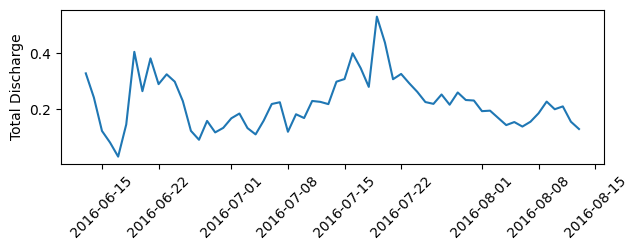

In [47]:
var = 'discharge_m_3_s'
var_labs = {'discharge_m_3_s': 'Total Discharge'}

fig, ax = plt.subplots(figsize=(7, 2))
plt.plot(daily_flow['date'], daily_flow[var])
plt.xticks(rotation = 45)
ax.set_ylabel(var_labs.get('discharge_m_3_s'))



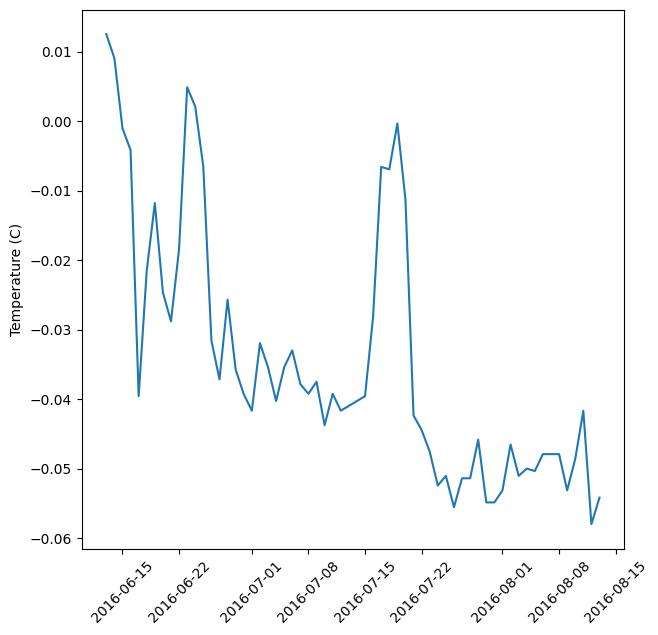

In [49]:
myplot(daily_flow, 'temperature_degrees_c')